<a href="https://colab.research.google.com/github/FutureDevPro/Project/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Business Problem**

Problem Statement -

Financial institutions want to predict whether a customer will default on their credit card payment next month based on historical billing, payment behavior, and demographic factors.

Why This Problem Is Important -

1. Reduces financial losses by identifying risky customers early.

2. Helps determine credit limits and interest rates.

3. Enables proactive customer outreach.

4. Supports regulatory compliance and risk scoring.

Business Impact -

*Revenue protection* -	Avoid losses from unpaid balances

*Cost reduction* - Fewer write-offs and collections expenses

*Customer experience*	- Personalized reminders and offers

**2. Objective**

Predict whether a customer will default on their credit card payment next month.

Output Variable - default_payment_next_month

Type of Problem - Binary Classification

1 → Default

0 → No default

**3. Specify Data Requirements**

Input Features -

- Credit limit

- Gender

- Education & Marriage status

- Age

- Bill amounts (BILL_AMT1–6)

- Previous payments (PAY_AMT1–6)

- Past payment status (PAY_0–PAY_6)

Target Variable - default payment next month

Time Range - Monthly billing and payment information (6 months of history).

Granularity - Customer-level record.

Dataset Origin - Dataset is taken from Kaggle

**4. Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RAW_CSV = 'creditCardFraud_28011964_120214.csv'
TARGET = "default payment next month"

In [ ]:
data=pd.read_csv(RAW_CSV)

In [ ]:
data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [ ]:
data.shape

(1001, 24)

In [ ]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Missing Value Handling

The dataset contains no missing values (data.isna().sum() = all zeros).

No imputation required.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [ ]:
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True )

<Axes: >

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.


models must be evaluated with recall/precision/AUC, not accuracy alone

Boxplots for bill amounts

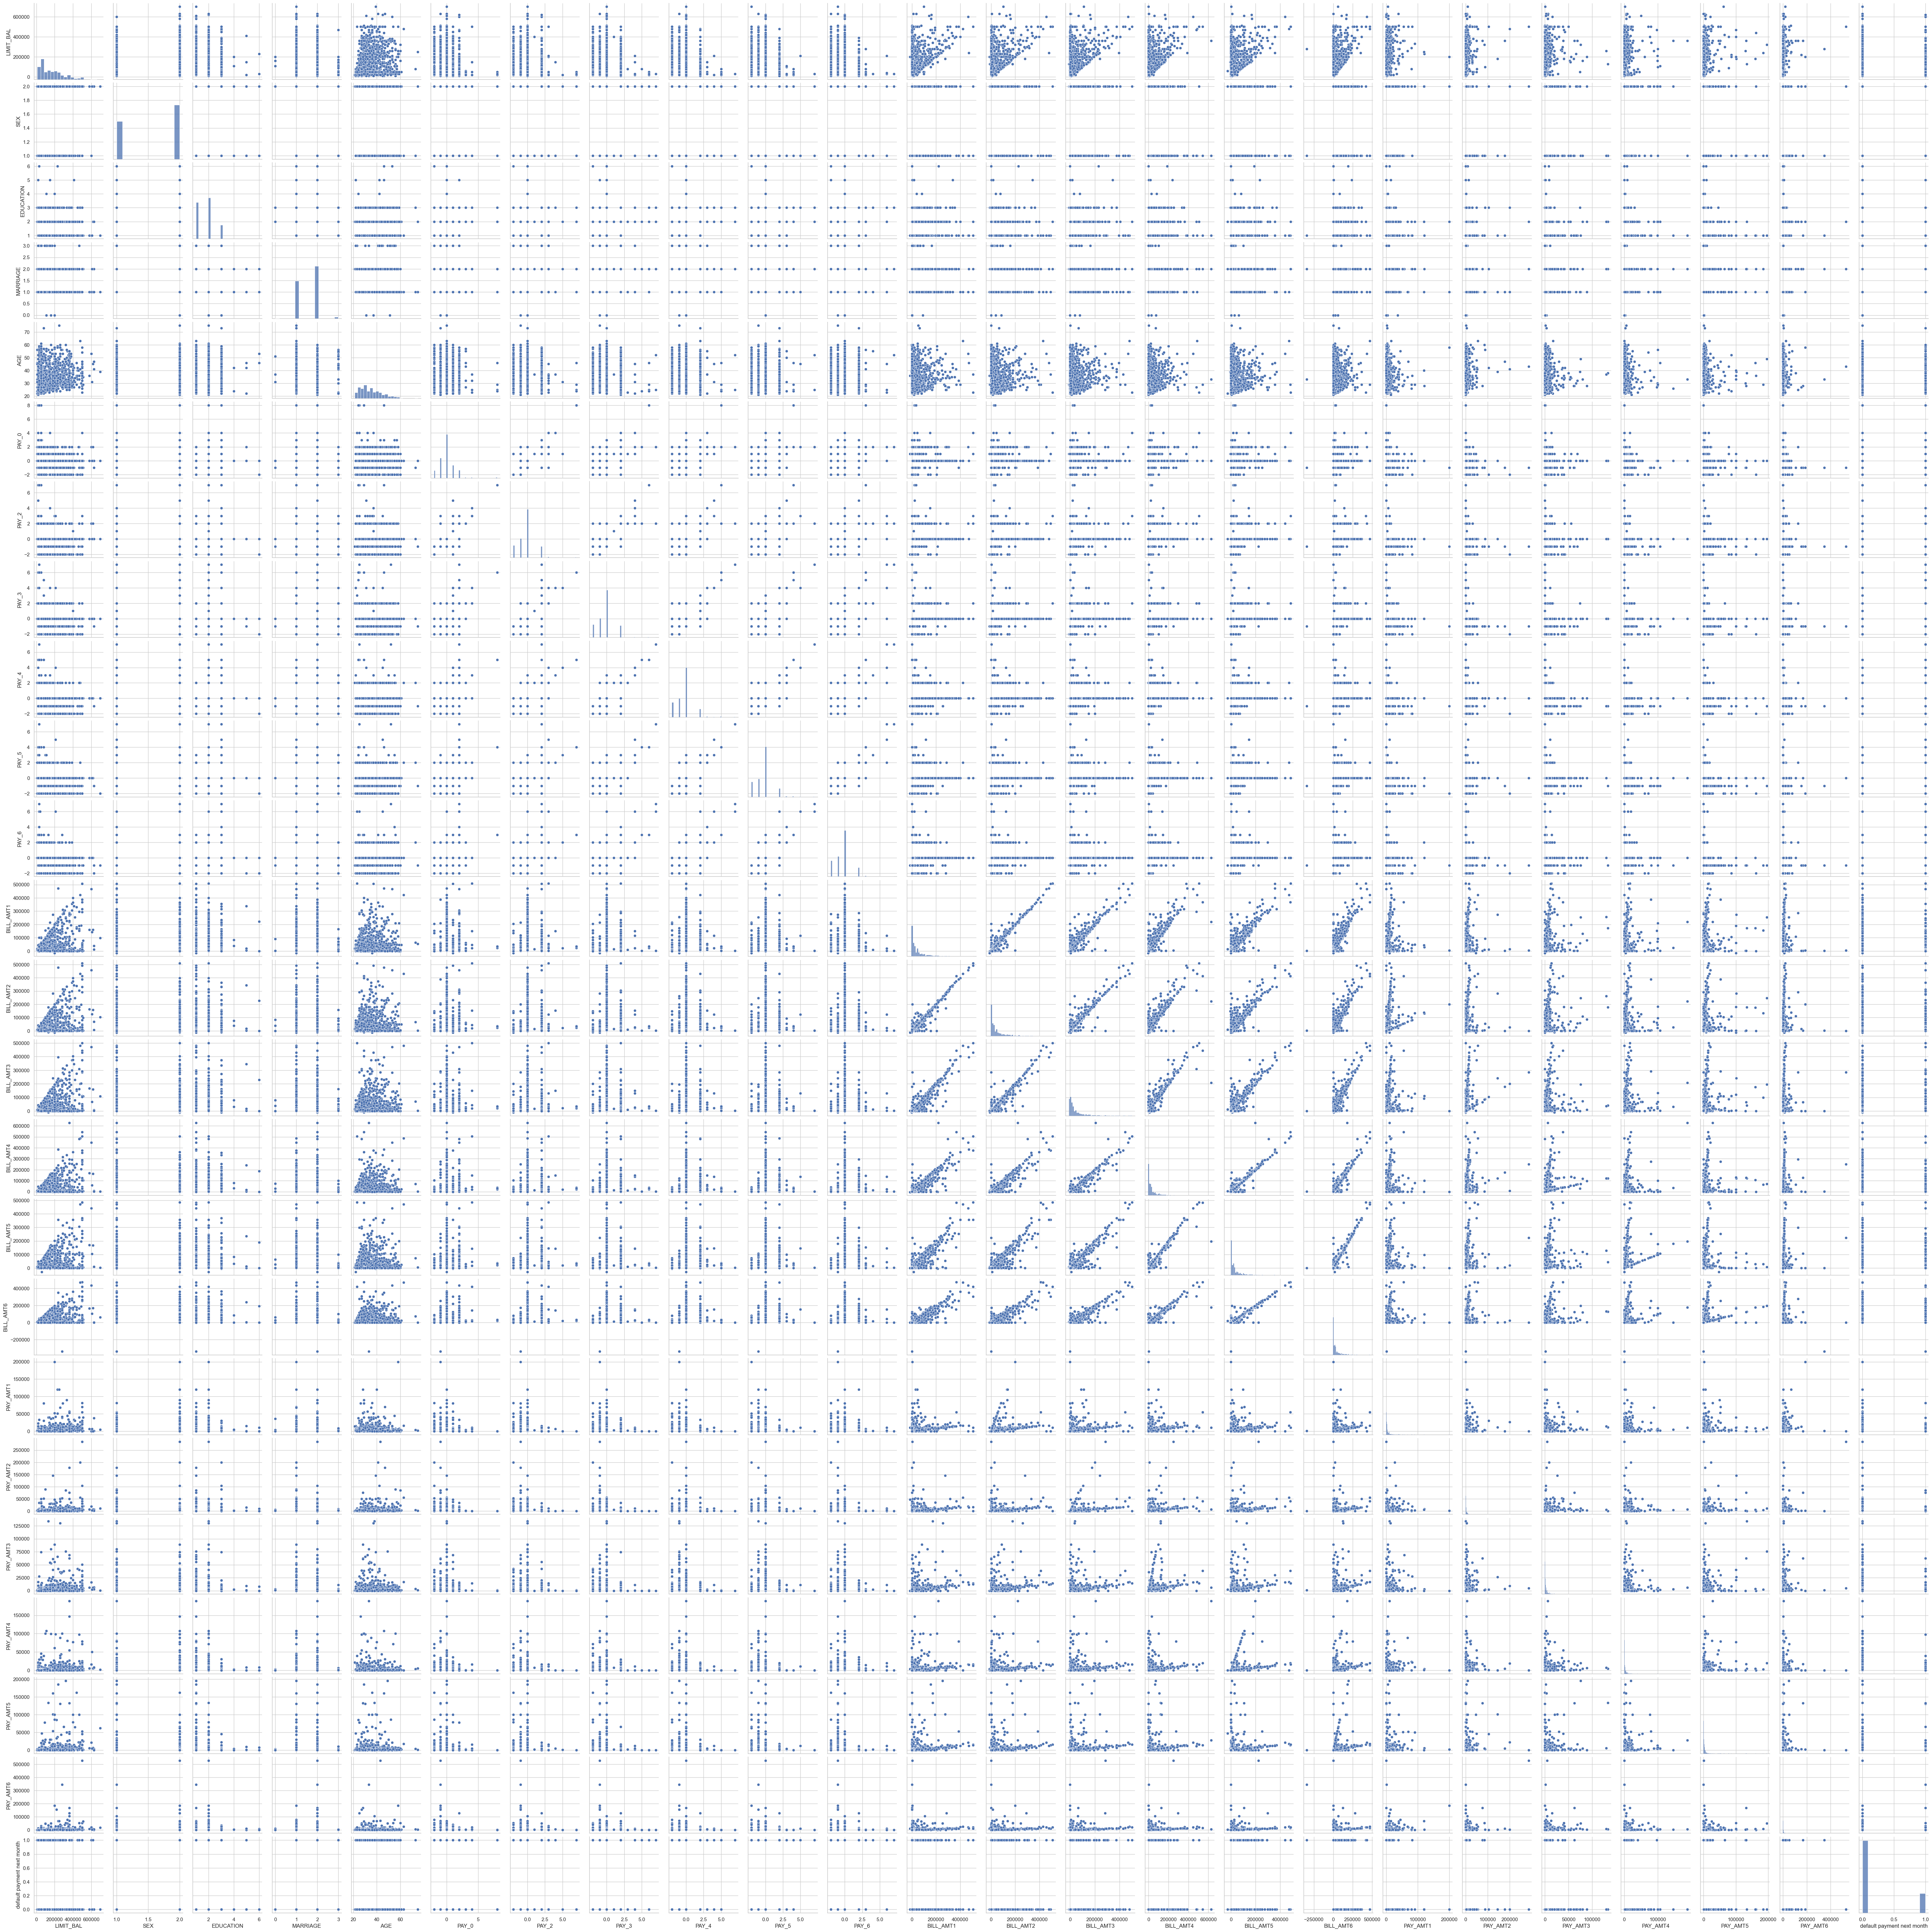

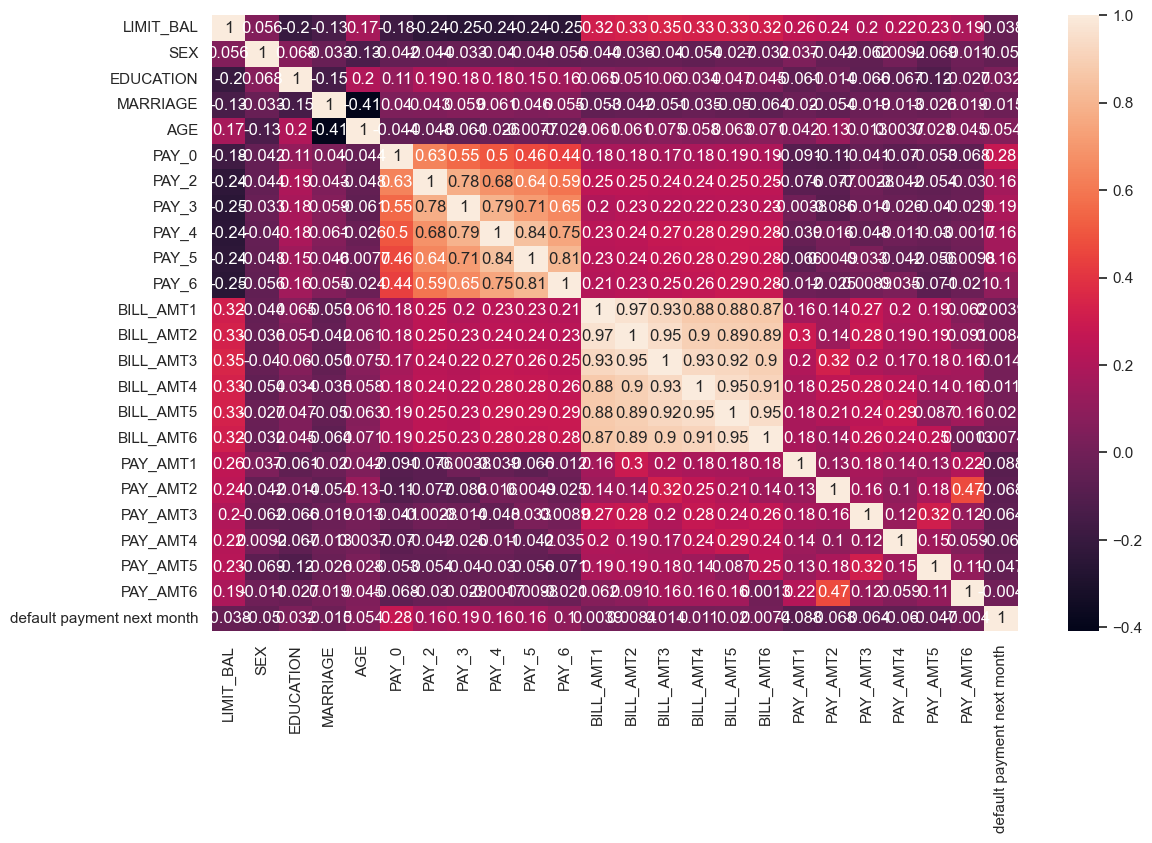

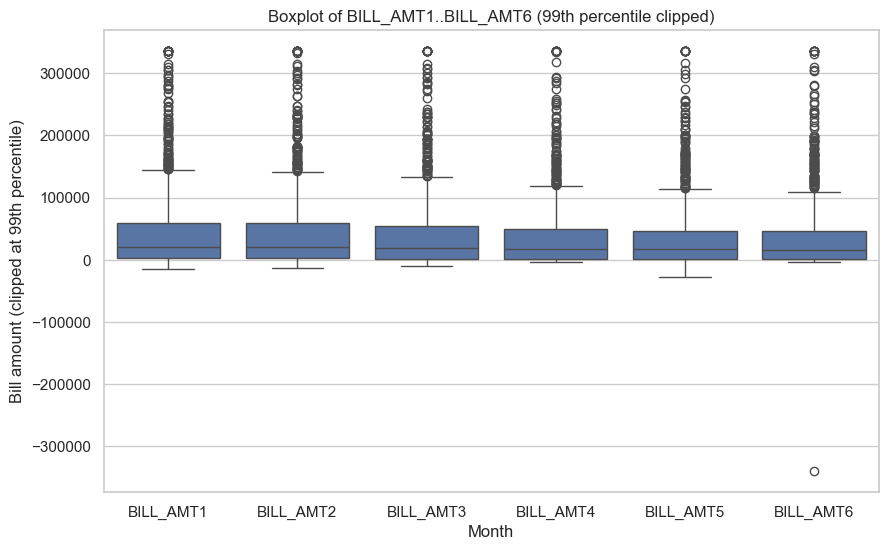

In [ ]:
def plot_bill_boxplots(df, bill_cols=None):
    if bill_cols is None:
        bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
    # melt to long form for a single boxplot grid
    bills_long = df[bill_cols].melt(var_name='month', value_name='bill_amount')
    # clip extreme outliers for better display (optional)
    q99 = bills_long['bill_amount'].quantile(0.99)
    bills_long['bill_amount_clipped'] = bills_long['bill_amount'].clip(upper=q99)

    plt.figure(figsize=(10,6))
    sns.boxplot(x='month', y='bill_amount_clipped', data=bills_long)
    plt.title('Boxplot of BILL_AMT1..BILL_AMT6 (99th percentile clipped)')
    plt.ylabel('Bill amount (clipped at 99th percentile)')
    plt.xlabel('Month')
    plt.show()

plot_bill_boxplots(data)


- Bill amounts are right-skewed with long upper tails (few customers with very large bills).

- Clipping reveals median/iqr trends: check if median bill is increasing/decreasing across months — rising median may indicate worsening behavior.

Bar plot for payment status variables

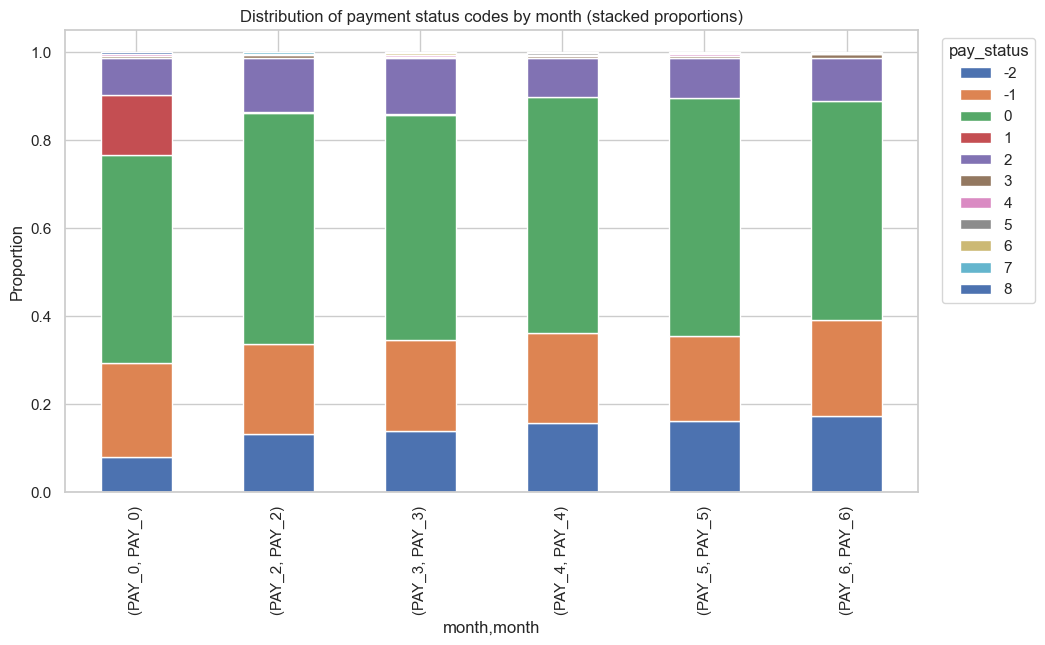

In [ ]:
def plot_payment_status_bars(df, pay_cols=None):
    if pay_cols is None:
        # column names in this dataset: PAY_0, PAY_2, PAY_3, ... PAY_6 (PAY_1 sometimes named PAY_0)
        pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
    # gather counts for each status code per month
    pay_long = df[pay_cols].melt(var_name='month', value_name='pay_status')
    pay_long['pay_status'] = pay_long['pay_status'].astype(int)

    # compute normalized counts (pct) for stacked bar plotting
    pivot = (pay_long.groupby(['month','pay_status'])
                     .size()
                     .groupby(level=0)
                     .apply(lambda x: x / x.sum())
                     .unstack(fill_value=0)
                    )
    pivot = pivot.sort_index(key=lambda x: [int(s.split('_')[-1]) for s in x])  # keep month order

    pivot.plot(kind='bar', stacked=True, figsize=(11,6))
    plt.legend(title='pay_status', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.ylabel('Proportion')
    plt.title('Distribution of payment status codes by month (stacked proportions)')
    plt.show()

plot_payment_status_bars(data)


- pay_status codes: negative or 0 usually means on-time / early; positive numbers indicate months delayed.

- Look for increasing proportion of positive pay_status codes across months for the same cohort: that suggests deteriorating payment behavior leading to higher default risk.

- If a particular month shows spikes in bad statuses, that month is predictive.

C:\Users\udit2\AppData\Local\Temp\ipykernel_23868\2733390451.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No default (0)', 'Default (1)'])


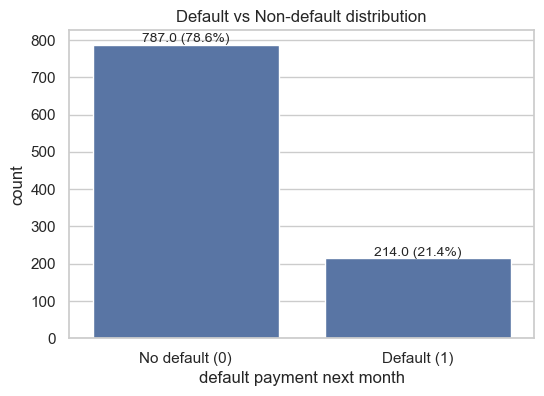

In [ ]:
# Countplot + percentage annotation
def plot_default_distribution(df, target_col='default payment next month'):
    fig, ax = plt.subplots(figsize=(6,4))
    order = df[target_col].value_counts().sort_index().index
    sns.countplot(x=target_col, data=df, ax=ax, order=order)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height} ({height/total:.1%})',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)
    ax.set_xticklabels(['No default (0)', 'Default (1)'])
    ax.set_title('Default vs Non-default distribution')
    plt.show()

plot_default_distribution(data)


In [ ]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

67% training / 33% testing

In [ ]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [ ]:
test_scaler = train_scaler
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data = test_scaler.transform(x_test)

In [ ]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)


In [ ]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)


In [ ]:
scaled_train_df.head()


LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
311  -0.827063 -1.187465   0.287024  0.730441 -1.282089 -0.031171  0.115654   
765   0.239455  0.842130  -1.030140 -1.151849  0.006733 -1.701941 -1.465732   
630  -0.446164 -1.187465   1.604187 -1.151849  2.262170 -0.031171  0.115654   
0    -0.903243 -1.187465   0.287024 -1.151849  2.369572 -0.866556  0.115654   
316  -0.446164 -1.187465   0.287024  0.730441 -0.637678  0.804214  1.697039   

        PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
311  0.105611  0.225653  0.220334  ...  -0.176369  -0.360048  -0.340346   
765 -1.466817 -1.463595 -1.476489  ...  -0.630462  -0.569559  -0.612888   
630  0.105611  0.225653  0.220334  ...  -0.176218  -0.173591  -0.266578   
0   -0.680603  0.225653  0.220334  ...  -0.155442  -0.308208  -0.319868   
316  1.678039  0.225653  0.220334  ...   0.065414   0.083910   0.119615   

     BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
311  -0.309805 -0.305588 -0.184075 -0.348399 -0.294666 -0.195700 -0.177211  
765  -0.614997 -0.103300 -0.202343 -0.165886 -0.364653 -0.306803 -0.203779  
630  -0.244778 -0.119159 -0.215453 -0.279526 -0.176838 -0.129149  0.010829  
0    -0.313196 -0.302945  1.718397  0.574694  0.413945 -0.268528 -0.174494  
316   0.141737 -0.258893 -0.293788 -0.212424 -0.191632 -0.203810 -0.117521  

[5 rows x 23 columns]

Feature Scaling

Standardization applied using StandardScaler():

Fit on training data

Transform applied to test data

Scaling ensures features such as bill amounts, pay amounts, and credit limits operate on similar ranges.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac=accuracy_score(y_test, pred_y)
ac

0.676737160120846

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [ ]:

#finding the best parameters
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.769 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.694 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.321 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.776 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.731 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [ ]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [ ]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.8066465256797583

In [ ]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]


            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [ ]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

xgb_new = XGBClassifier(missing=np.nan)


In [ ]:
pred_y_xgb_new=xgb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [ ]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [ ]:
ac_xgb_new

0.8187311178247734

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       271
           1       0.26      0.45      0.33        60

    accuracy                           0.67       331
   macro avg       0.56      0.58      0.55       331
weighted avg       0.75      0.67      0.70       331



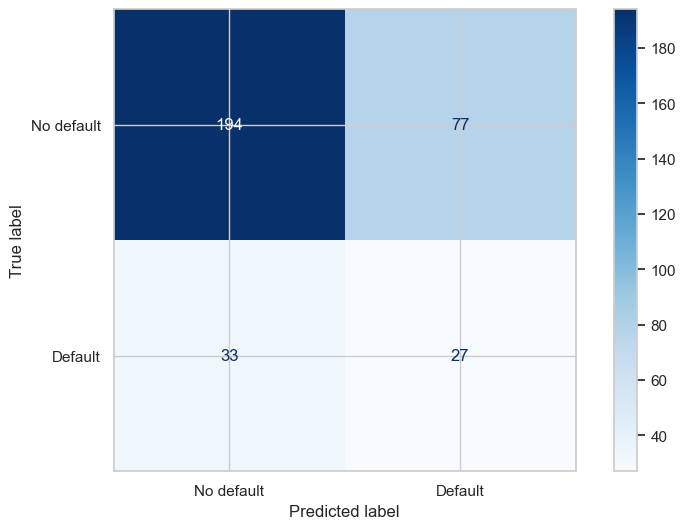

ROC AUC: 0.6485


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# ensure we have X_test and y_test if model training branch created them:
if 'x_test' in globals() and 'y_test' in globals():
    y_pred = xgb_new.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default','Default'])
    disp.plot(cmap='Blues')
    plt.show()

    # ROC AUC
    if hasattr(xgb_new, "predict_proba"):
        y_proba = xgb_new.predict_proba(x_test)[:,1]
        auc = roc_auc_score(y_test, y_proba)
        print(f'ROC AUC: {auc:.4f}')\


Feature importance

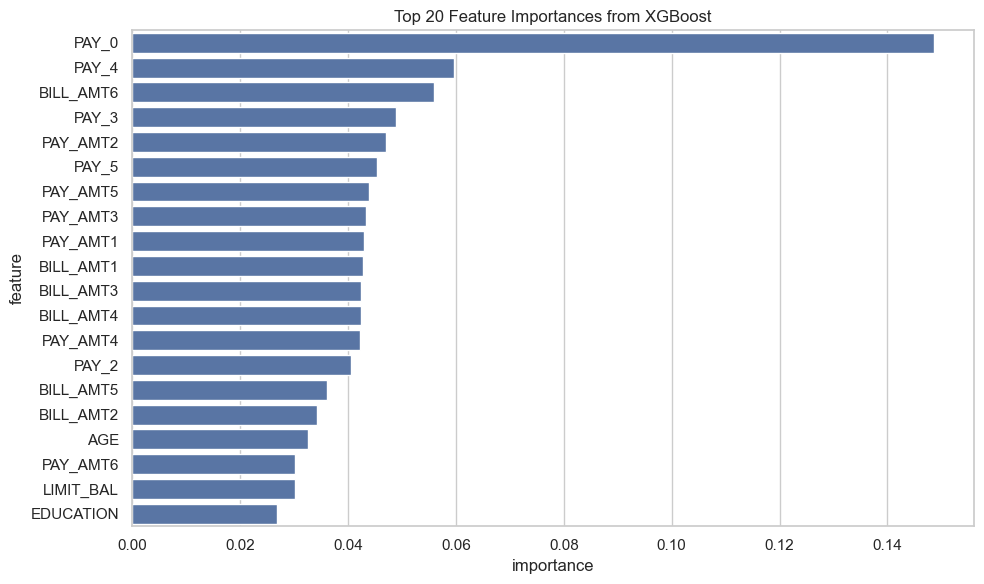

In [ ]:

# Compute & plot feature importances
feature_names = data.drop(columns=['default payment next month']).columns.tolist()
importances = xgb_new.feature_importances_
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fi_df.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()


**5. Exploratory Data Analysis (EDA)**

*Distribution of financial attributes* -

Bill amounts and payments appear skewed due to wide differences in customer spending patterns.

*Default rate* -

The dataset typically has <23% default cases (common for this dataset).

*Correlation Insights* -

- Strong correlation between bill amounts across months.

- Strong correlation between payment-delay variables (PAY_0 → PAY_6).

- Confirms monthly financial behavior follows temporal patterns.

*Payment Delay vs Default* -

Higher delay codes → higher default probability.

**6. Proposed ML Methodology**

Gaussian Naive Bayes -

- Used as the baseline classifier.

- Accuracy before tuning: ~66%.

- After tuning (var_smoothing = 0.5): ~77.9% accuracy.


XGBoost Classifier -

- Tuned using GridSearchCV.

- Best model parameters included:

    - n_estimators = 50

    - max_depth = 3

    - random_state = 0

- Final accuracy: ~82.03% (highest among tested models).


Why These Models -

- GaussianNB → fast baseline, easy to compare.

- XGBoost → powerful for tabular, handles non-linearity, best performance in financial risk modelling.

Hyperparameter Tuning -

- Performed using GridSearchCV for both models.

- var_smoothing for GaussianNB

- n_estimators, max_depth, random_state for XGBoost.

**7. Train & Evaluate the Model**

1. Data Loading

2. Exploratory Data Analysis

3. Train–Test Split

4. Scaling

5. Model Training (NB & XGBoost)

6. Hyperparameter Optimization

7. Evaluate performance on the test set

Evaluation Metrics Used -

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       271
           1       0.26      0.45      0.33        60

    accuracy                           0.67       331
   macro avg       0.56      0.58      0.55       331
weighted avg       0.75      0.67      0.70       331



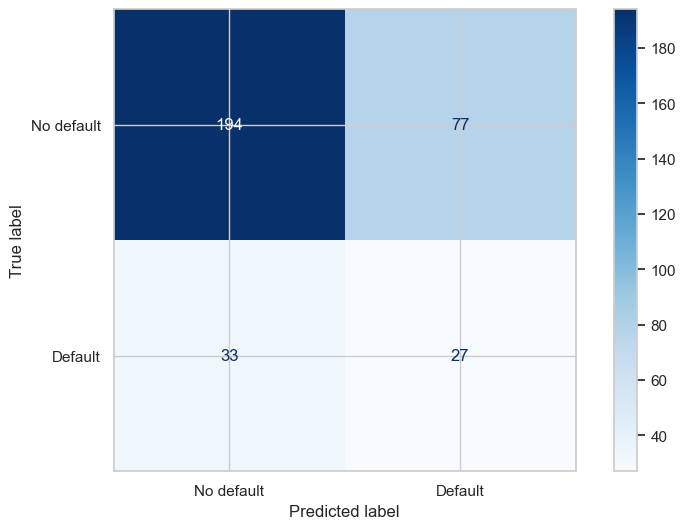

ROC AUC: 0.6485


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# ensure we have X_test and y_test if model training branch created them:
if 'x_test' in globals() and 'y_test' in globals():
    y_pred = xgb_new.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default','Default'])
    disp.plot(cmap='Blues')
    plt.show()

    # ROC AUC
    if hasattr(xgb_new, "predict_proba"):
        y_proba = xgb_new.predict_proba(x_test)[:,1]
        auc = roc_auc_score(y_test, y_proba)
        print(f'ROC AUC: {auc:.4f}')\


XGBoost was selected due to highest accuracy (~82%).

Business Interpretation

- High recall → fewer risky customers missed (important for banks).

- High precision → fewer safe customers labeled risky (reduces customer dissatisfaction).

- Balanced metrics → better overall financial risk management.

**Final Recommendations|**


Risk Management Actions

- Auto-notify customers at high risk (SMS/Email).

- Reduce or temporarily freeze credit limits for repeat defaulters.

- Provide loan restructuring / repayment plans for vulnerable customers.

Business Strategy Actions

- Offer pre-approved credit to low-risk customers.

- Build a risk-adjusted interest rate model.

- Use predictions to design personalized credit products.

Technical Deployment Recommendations

- Integrate model.pkl into the bank’s analytics dashboard.

- Automate daily scoring using scheduled jobs.

- Monitor real-world performance → retrain monthly using new data.